In [29]:
from numpy.linalg import svd
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_float
import glob

So we've imported a bunch of libraries--now we're going to make a function that'll give us a rank $k$ approximation of our image using numpy's svd utility and some matrix multiplication.

In [2]:
def reconstruct_svd(image,k):
    U,S,V = svd(image, full_matrices=False)
    reconst_matrix = np.dot(U[:,:k], np.dot(np.diag(S[:k]), V[:k,:]))
    
    return reconst_matrix, S

Now we'll load an image in.

In [34]:
%pwd
%cd ..
%cd ..
%cd ..
%pwd

/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train
/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification
/data1/dbashir/courses/deeplearning1/nbs/data


u'/data1/dbashir/courses/deeplearning1/nbs/data'

/data1/dbashir/courses/deeplearning1/nbs


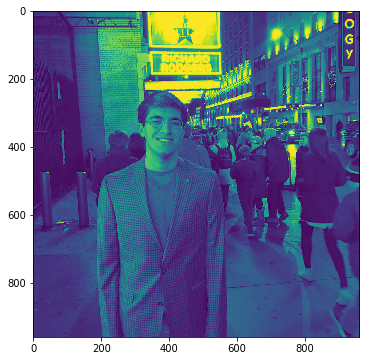

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
%cd ..

img = Image.open('SVD_Img.jpg')
greyimg = rgb2gray(img_as_float(img))

plt.figure(figsize=(9, 6))
plt.imshow(greyimg);

In [36]:
k = 50

reconst_img, s = reconstruct_svd(greyimg, k)

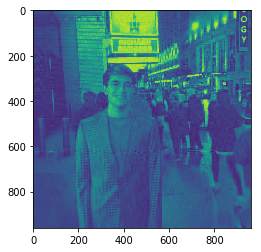

In [37]:
plt.imshow(reconst_img)

Okay, now we've seen how to get a rank approximation of the image. Let's train!

First, we'll make sure we have directories set up.

# Prepare the Data 

In [38]:
import os, sys

current_dir = os.getcwd()
DATA_HOME_DIR = current_dir+'/data/daniel-classification/'

%cd $DATA_HOME_DIR
%mkdir valid
%cd valid
%mkdir Daniel
%mkdir Not_Daniel
%cd ..

/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification
mkdir: cannot create directory 'valid': File exists
/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/valid
mkdir: cannot create directory 'Daniel': File exists
mkdir: cannot create directory 'Not_Daniel': File exists
/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification


In [7]:
# def moveFromcn(pathName):
#     %cd $DATA_HOME_DIR/train/pathName
#     g = glob('*.jpg')
#     shuf = np.random.permutation(g)
#     for i in range(17): os.rename(shuf[i], DATA_HOME_DIR+'/valid/' + shuf[i]) #a little more than 10% of the images

In [10]:
#now move photos into the validation set.
%cd $DATA_HOME_DIR/train/Daniel
g = glob.glob('*.jpg') #different types of photos so just grab everything
shuf = np.random.permutation(g)
print(shuf[:5])
for i in range(16): os.rename(shuf[i], DATA_HOME_DIR+'/valid/Daniel/' + shuf[i])
    
%cd ..

%cd $DATA_HOME_DIR/train/Not_Daniel
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
print(shuf[:5])
for i in range(16): os.rename(shuf[i], DATA_HOME_DIR+'/valid/Not_Daniel/' + shuf[i])

/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train/Not_Daniel
['IMG_4670.jpg' 'IMG_5573.jpg' 'IMG_7387.jpg' 'IMG_7207.jpg' 'IMG_3473.jpg']


In [ ]:
%cd $DATA_HOME_DIR/train/Not_Daniel
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
print(shuf[:5])
for i in range(13): os.rename(shuf[i], DATA_HOME_DIR+'/valid/Not_Daniel/' + shuf[i])

Needless to say, there isn't really an $\textit{abundance}$ of data to use, but we'll make things work somehow...

# Pre-Process/Resize Images

Our images are all pretty high quality and of really large size--I'm going to bring them down (although not too much) to 960x960.

In [20]:
#import cv2
a = os.path.join(DATA_HOME_DIR, 'train')
danielDir = os.path.join(a, 'Daniel')
notDanielDir = os.path.join(a, 'Not_Daniel')

i = 0
for image in os.listdir(danielDir):
    imageDir = os.path.join(danielDir, image)
    img = Image.open(imageDir)
    img = img.resize((960,960), Image.ANTIALIAS)
    img = img.convert('RGB')
    imgName = 'IMG_' + str(i) + '.jpg'
    
    newImageDir = os.path.join(danielDir,imgName)
    img.save(newImageDir)
    i+=1

j = 0
for image in os.listdir(notDanielDir):
    imageDir = os.path.join(notDanielDir, image)
    img = Image.open(imageDir)
    img = img.resize((960,960), Image.ANTIALIAS)
    img = img.convert('RGB')
    imgName = 'IMG_' + str(i) + '.jpg'
    
    newImageDir = os.path.join(danielDir,imgName)
    img.save(newImageDir)
    j+=1

In [26]:
for image in os.listdir(danielDir):
    removeDir = os.path.join(danielDir,image)
    #print(image)
    #print(len(image))
    if len(image) == 12:
        os.remove(removeDir)
        
for image in os.listdir(notDanielDir):
    removeDir = os.path.join(notDanielDir,image)
    if len(image) == 12:
        os.remove(removeDir)

In [27]:
#import cv2
a = os.path.join(DATA_HOME_DIR, 'valid')
danielDir = os.path.join(a, 'Daniel')
notDanielDir = os.path.join(a, 'Not_Daniel')

i = 0
for image in os.listdir(danielDir):
    imageDir = os.path.join(danielDir, image)
    img = Image.open(imageDir)
    img = img.resize((960,960), Image.ANTIALIAS)
    img = img.convert('RGB')
    imgName = 'IMG_' + str(i) + '.jpg'
    
    newImageDir = os.path.join(danielDir,imgName)
    img.save(newImageDir)
    i+=1

j = 0
for image in os.listdir(notDanielDir):
    imageDir = os.path.join(notDanielDir, image)
    img = Image.open(imageDir)
    img = img.resize((960,960), Image.ANTIALIAS)
    img = img.convert('RGB')
    imgName = 'IMG_' + str(i) + '.jpg'
    
    newImageDir = os.path.join(danielDir,imgName)
    img.save(newImageDir)
    j+=1

In [28]:
for image in os.listdir(danielDir):
    removeDir = os.path.join(danielDir,image)
    #print(image)
    #print(len(image))
    if len(image) == 12:
        os.remove(removeDir)
        
for image in os.listdir(notDanielDir):
    removeDir = os.path.join(notDanielDir,image)
    if len(image) == 12:
        os.remove(removeDir)

# Perform SVD on Images

There clearly isn't a lot of data here--might not even be enough to properly train a basic classifier like we want to. So I'm going to artificially expand the data using SVD to make rank approximations of the images.

In [42]:
trainDir = os.path.join(DATA_HOME_DIR, 'train')
danielDirTrain = os.path.join(a, 'Daniel')
notDanielDirTrain = os.path.join(a, 'Not_Daniel')

for image in os.listdir(danielDirTrain):
    newStr = str(image[:-4]) + '.jpg'
    print(newStr)

IMG_2.jpg
IMG_3.jpg
IMG_6.jpg
IMG_15.jpg
IMG_10.jpg
IMG_11.jpg
IMG_16.jpg
IMG_12.jpg
IMG_5.jpg
IMG_0.jpg
IMG_7.jpg
IMG_14.jpg
IMG_8.jpg
IMG_9.jpg
IMG_1.jpg
IMG_13.jpg
IMG_4.jpg


In [46]:
trainDir = os.path.join(DATA_HOME_DIR, 'train')
danielDirTrain = os.path.join(a, 'Daniel')
notDanielDirTrain = os.path.join(a, 'Not_Daniel')

for image in os.listdir(danielDirTrain):
    for k in [45,55,60,68,75,85,95,100,110,120,130,180,200,256]:
        reconst_img, s = reconstruct_svd(greyimg, k)
        imgName = 'rank_' +str(k) + '_' + str(image)
        imageDir = os.path.join(danielDirTrain,imgName)
        
        img = Image.fromarray(reconst_img, 'RGB')
        
        img.save(imageDir)

for image in os.listdir(notDanielDirTrain):
    for k in [45,55,60,68,75,85,95,100,110,120,130,180,200,256]:
        reconst_img, s = reconstruct_svd(greyimg, k)
        imgName = 'rank_' +str(k) + '_' + str(image)
        imageDir = os.path.join(danielDirTrain,imgName)
        
        img = Image.fromarray(reconst_img, 'RGB')
        
        img.save(imageDir)
        
validDir = os.path.join(DATA_HOME_DIR, 'valid')
danielDirValid = os.path.join(validDir, 'Daniel')
notDanielDirValid = os.path.join(validDir, 'Not_Daniel')

for image in os.listdir(danielDirValid):
    for k in [45,55,60,68,75,85,95,100,110,120,130,180,200,256]:
        reconst_img, s = reconstruct_svd(greyimg, k)
        imgName = 'rank_' +str(k) + '_' + str(image)
        imageDir = os.path.join(danielDirTrain,imgName)
        
        img = Image.fromarray(reconst_img, 'RGB')
        
        img.save(imageDir)
        
for image in os.listdir(notDanielDirValid):
    for k in [45,55,60,68,75,85,95,100,110,120,130,180,200,256]:
        reconst_img, s = reconstruct_svd(greyimg, k)
        imgName = 'rank_' +str(k) + '_' + str(image)
        imageDir = os.path.join(danielDirTrain,imgName)
        
        img = Image.fromarray(reconst_img, 'RGB')
        
        img.save(imageDir)

In [55]:
a = os.path.join(DATA_HOME_DIR, 'train')
danielDirTrain = os.path.join(a, 'Daniel')

print(danielDirTrain)

/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train/Daniel


In [56]:
for image in os.listdir(danielDirTrain):
    for k in [45,55]:
        reconst_img, s = reconstruct_svd(greyimg, k)
        imgName = 'rank_' +str(k) + '_' + str(image)
        imageDir = os.path.join(danielDirTrain,imgName)
        
        img = Image.fromarray(reconst_img, 'RGB')
        
        img.save(imageDir)

In [61]:
for image in os.listdir(danielDirTrain):
    imagePath = os.path.join(danielDirTrain,image)
    img = Image.open(imagePath)
    greyimg = rgb2gray(img_as_float(img))
    for k in [45,55,60,68,75,85,95,100,110,120,130,180,200,256]:
        reconst_img, s = reconstruct_svd(greyimg, k)
        imgName = 'rank_' +str(k) + '_' + str(image)
        imageDir = os.path.join(danielDirTrain,imgName)
        
        img = Image.fromarray(reconst_img, 'RGB')
        
        img.save(imageDir)

In [62]:
notDanielDirTrain = os.path.join(a, 'Not_Daniel')

print(notDanielDirTrain)

/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train/Not_Daniel


In [133]:
%cd $DATA_HOME_DIR/train/Not_Daniel
%pwd

/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train/Not_Daniel


u'/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train/Not_Daniel'

rank_100_IMG_96.jpg


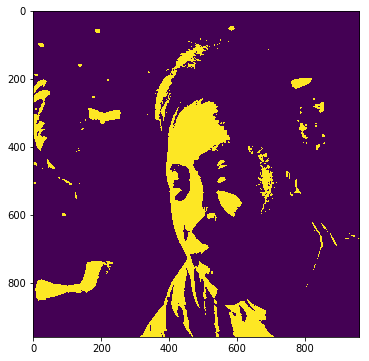

In [142]:
import cv2

imgArray = []
img = Image.open('IMG_82.jpg')
greyimg = rgb2gray(img_as_float(img))
k = 100
reconst_img, s = reconstruct_svd(greyimg, k)
#plt.imshow(reconst_img)

imgName = 'rank_' + str(k) + '_' + str(image)
print(imgName)
imageDir = os.path.join(notDanielDirTrain,imgName)

img = Image.fromarray(reconst_img, 'RGB')
#plt.imshow(img)

#reconst_img.save(imageDir)

#cv2.imwrite("filename.png", reconst_img)
img = Image.open('filename.png')
greyimg = rgb2gray(img_as_float(img))

plt.figure(figsize=(9, 6))
plt.imshow(greyimg);

In [144]:
notDanielDirTrain = os.path.join(a, 'Not_Daniel')

print(notDanielDirTrain)

/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train/Not_Daniel


In [146]:
%pwd
%cd ..

/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train


In [148]:
for image in os.listdir(notDanielDirTrain):
    imagePath = os.path.join(notDanielDirTrain,image)
    img = Image.open(imagePath)
    greyimg = rgb2gray(img_as_float(img))
    for k in [45,55,60,68,75,85,95,100,110,120,130,180,200,256]:
        reconst_img, s = reconstruct_svd(greyimg, k)
        imgName = 'rank_' +str(k) + '_' + str(image)
        imageDir = os.path.join(notDanielDirTrain,imgName)
        
        cv2.imwrite(imageDir, reconst_img)

In [149]:
for image in os.listdir(danielDirTrain):
    imagePath = os.path.join(danielDirTrain,image)
    img = Image.open(imagePath)
    greyimg = rgb2gray(img_as_float(img))
    for k in [45,55,60,68,75,85,95,100,110,120,130,180,200,256]:
        reconst_img, s = reconstruct_svd(greyimg, k)
        imgName = 'rank_' +str(k) + '_' + str(image)
        imageDir = os.path.join(danielDirTrain,imgName)
        
        cv2.imwrite(imageDir, reconst_img)

In [151]:
#now move photos into the validation set.
%cd $DATA_HOME_DIR/train/Daniel
g = glob('*.jpg') #different types of photos so just grab everything
shuf = np.random.permutation(g)
print(shuf[:5])
for i in range(250): os.rename(shuf[i], DATA_HOME_DIR+'/valid/Daniel/' + shuf[i])
    
%cd ..

%cd $DATA_HOME_DIR/train/Not_Daniel
g = glob('*.jpg')
shuf = np.random.permutation(g)
print(shuf[:5])
for i in range(250): os.rename(shuf[i], DATA_HOME_DIR+'/valid/Not_Daniel/' + shuf[i])

/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train/Daniel
['rank_75_IMG_125.jpg' 'rank_75_IMG_105.jpg' 'rank_55_IMG_127.jpg' 'rank_45_IMG_25.jpg'
 'rank_180_IMG_59.jpg']
/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train
/data1/dbashir/courses/deeplearning1/nbs/data/daniel-classification/train/Not_Daniel
['rank_75_IMG_102.jpg' 'rank_75_IMG_110.jpg' 'rank_180_IMG_32.jpg' 'IMG_9.jpg' 'rank_110_IMG_16.jpg']


There's a $\textit{lot}$ of data now...

# Prepare Batches

In [155]:
%cd ..

/data1/dbashir/courses/deeplearning1/nbs


In [156]:
%matplotlib inline
from __future__ import print_function, division
path = "data/daniel-classification/"
import utils; reload(utils)
from utils import *
from IPython.display import FileLink

In [157]:
batch_size = 64

In [158]:
batches = get_batches(path+'train', batch_size=batch_size)
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)

Found 3430 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [159]:
val_batches = get_batches(path+'valid', shuffle=False, batch_size=32)
batches = get_batches(path+'train', shuffle=False, batch_size=32)

Found 528 images belonging to 2 classes.
Found 3430 images belonging to 2 classes.


In [160]:
import bcolz
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): return bcolz.open(fname)[:]

In [161]:
trn_data = get_data(path+'train')
val_data = get_data(path+'valid')

Found 3430 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [162]:
trn_data.shape

(3430, 3, 224, 224)

In [163]:
save_array(path+'results/val.dat', val_data)
save_array(path+'results/trn.dat', trn_data)

In [164]:
val_data = load_array(path+'results/val.dat')
trn_data = load_array(path+'results/trn.dat')

In [165]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [166]:
val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [167]:
trn_labels.shape

(3430, 2)

# Testing a Model

Ok, let's take a model and see how this goes.

In [95]:
myModel = Sequential()

In [103]:
trn_data.shape

(2096, 3, 224, 224)

In [109]:
from keras.models import Sequential
from keras.layers import Dense, Activation

myModel.add(BatchNormalization(axis=1,input_shape=(3,224,224)))
myModel.add(Convolution2D(3,3,32,activation='relu'))
myModel.add(BatchNormalization(axis=1))
myModel.add(MaxPooling2D(pool_size=(2,2)))
myModel.add(Flatten())
myModel.add(Dense(2,activation='softmax', W_regularizer=l2(0.01)))

ValueError: Input 0 is incompatible with layer convolution2d_9: expected ndim=4, found ndim=2

In [98]:
from keras.optimizers import Adam
myModel.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
myModel.fit_generator(batches, batches.nb_sample, nb_epoch=2, 
                      validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2


ValueError: Error when checking model target: expected dense_4 to have shape (None, 8) but got array with shape (1, 2)

In [184]:
modelOne = Sequential()
#input = 224x224 images
#first arg is the # of filters, then the size (16 filters, size 3x3 not entered as a tuple)
modelOne.add(Convolution2D(64,3,3, activation='relu', input_shape=trn_data.shape[1:]))
modelOne.add(MaxPooling2D(pool_size=(2,2)))
modelOne.add(Flatten()) #flattens 3D shape to 2D for Dense layer
#modelOne.add(Dropout(0.25))
modelOne.add(Dense(2,activation='softmax'))

In [185]:
modelOne.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [186]:
modelOne.fit_generator(batches, batches.nb_sample, nb_epoch=6, 
                      validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/6
3430/3430 [==============================] - 44s - loss: 6.3947 - acc: 0.5735 - val_loss: 7.9891 - val_acc: 0.4981
Epoch 2/6
3430/3430 [==============================] - 42s - loss: 7.8428 - acc: 0.5000 - val_loss: 7.9293 - val_acc: 0.4981
Epoch 3/6
3430/3430 [==============================] - 42s - loss: 7.7862 - acc: 0.4971 - val_loss: 7.9241 - val_acc: 0.4943
Epoch 4/6
3430/3430 [==============================] - 41s - loss: 7.7339 - acc: 0.4988 - val_loss: 7.8557 - val_acc: 0.4943
Epoch 5/6
3430/3430 [==============================] - 41s - loss: 8.4863 - acc: 0.2461 - val_loss: 1.3522 - val_acc: 0.4527
Epoch 6/6
3430/3430 [==============================] - 42s - loss: 1.3893 - acc: 0.5621 - val_loss: 0.9649 - val_acc: 0.4811


In [187]:
basicModel = Sequential()
#input = 224x224 images
#first arg is the # of filters, then the size (16 filters, size 3x3 not entered as a tuple)
basicModel.add(BatchNormalization(axis=1, input_shape=trn_data.shape[1:]))
basicModel.add(Flatten()) #flattens 3D shape to 2D for Dense layer
basicModel.add(Dense(30,activation='relu'))
basicModel.add(Dense(2,activation='softmax', W_regularizer=l2(0.01)))

In [188]:
basicModel.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [189]:
basicModel.fit_generator(batches, batches.nb_sample, nb_epoch=6, 
                      validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/6
3430/3430 [==============================] - 45s - loss: 8.3958 - acc: 0.4808 - val_loss: 8.0651 - val_acc: 0.5019
Epoch 2/6
3430/3430 [==============================] - 41s - loss: 8.3591 - acc: 0.4831 - val_loss: 8.0891 - val_acc: 0.5000
Epoch 3/6
3430/3430 [==============================] - 42s - loss: 8.2740 - acc: 0.4883 - val_loss: 8.0540 - val_acc: 0.5019
Epoch 4/6
3430/3430 [==============================] - 40s - loss: 9.2762 - acc: 0.4251 - val_loss: 8.1129 - val_acc: 0.4981
Epoch 5/6
3430/3430 [==============================] - 42s - loss: 7.7178 - acc: 0.5224 - val_loss: 8.1129 - val_acc: 0.4981
Epoch 6/6
3430/3430 [==============================] - 41s - loss: 7.7302 - acc: 0.5216 - val_loss: 8.1128 - val_acc: 0.4981


In [190]:
basicModel2 = Sequential()
#input = 224x224 images
#first arg is the # of filters, then the size (16 filters, size 3x3 not entered as a tuple)
basicModel2.add(BatchNormalization(axis=1, input_shape=trn_data.shape[1:]))
basicModel2.add(Flatten()) #flattens 3D shape to 2D for Dense layer
basicModel2.add(Dense(20,activation='relu'))
basicModel2.add(Dense(2,activation='softmax', W_regularizer=l2(0.01)))

Let's try different batch sizes.

In [191]:
batch_size = 32
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)
batches = get_batches(path+'train', shuffle=False, batch_size=batch_size)

Found 528 images belonging to 2 classes.
Found 3430 images belonging to 2 classes.


In [192]:
sgd = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
basicModel.compile(sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [193]:
basicModel.fit_generator(batches, batches.nb_sample, nb_epoch=6, 
                      validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/6
3430/3430 [==============================] - 44s - loss: 7.7322 - acc: 0.5216 - val_loss: 8.1128 - val_acc: 0.4981
Epoch 2/6
3430/3430 [==============================] - 42s - loss: 7.7205 - acc: 0.5224 - val_loss: 8.1128 - val_acc: 0.4981
Epoch 3/6
3430/3430 [==============================] - 41s - loss: 7.7205 - acc: 0.5224 - val_loss: 8.1128 - val_acc: 0.4981
Epoch 4/6
3430/3430 [==============================] - 42s - loss: 7.7204 - acc: 0.5224 - val_loss: 8.1128 - val_acc: 0.4981
Epoch 5/6
3430/3430 [==============================] - 41s - loss: 7.7204 - acc: 0.5224 - val_loss: 8.1128 - val_acc: 0.4981
Epoch 6/6
3430/3430 [==============================] - 41s - loss: 7.7204 - acc: 0.5224 - val_loss: 8.1128 - val_acc: 0.4981


Ew..... Let's try VGG.

In [194]:
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

In [195]:
model.pop()
for layer in model.layers: layer.trainable=False

In [196]:
model.add(Dense(2, activation='softmax'))

In [197]:
def fit_model(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, samples_per_epoch=batches.n, nb_epoch=nb_epoch, 
                        validation_data=val_batches, nb_val_samples=val_batches.n)

In [198]:
opt = RMSprop(lr=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [199]:
fit_model(model, batches, val_batches, nb_epoch=2)

Epoch 1/2
3430/3430 [==============================] - 69s - loss: 8.0709 - acc: 0.4942 - val_loss: 8.0285 - val_acc: 0.5019
Epoch 2/2
3430/3430 [==============================] - 68s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0285 - val_acc: 0.5019


# Expand and Augment Data

I know that there isn't much data--so before I do anything with it, I'm going to first use this fancy SVD trick to create a bunch of low-rank approximations of each image (expand set by probably 5x or so), then do augmentations on everything.

In [200]:
gen_t = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.05, 
                                shear_range=0.1, rotation_range=15, channel_shift_range=20)
batches = get_batches(path+'train', gen_t, batch_size=batch_size)

Found 3430 images belonging to 2 classes.


In [203]:
model = Sequential([
        BatchNormalization(axis=1,input_shape=(3,224,224)),
        Flatten(),
        Dense(100, activation='relu'),
        BatchNormalization(),
        Dense(2,activation='softmax')
    ])
model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [204]:
model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(batches, batches.nb_sample, nb_epoch=3, validation_data=val_batches,
                   nb_val_samples=val_batches.nb_sample)

Epoch 1/3
3430/3430 [==============================] - 47s - loss: 0.7791 - acc: 0.4913 - val_loss: 1.0191 - val_acc: 0.4981
Epoch 2/3
3430/3430 [==============================] - 43s - loss: 0.7172 - acc: 0.5120 - val_loss: 0.8562 - val_acc: 0.4981
Epoch 3/3
3430/3430 [==============================] - 43s - loss: 0.7211 - acc: 0.4866 - val_loss: 0.7532 - val_acc: 0.4905


In [205]:
model.optimizer.lr = 0.001
model.fit_generator(batches, batches.nb_sample, nb_epoch=3, validation_data=val_batches,
                   nb_val_samples=val_batches.nb_sample)

Epoch 1/3
3430/3430 [==============================] - 45s - loss: 0.7117 - acc: 0.5137 - val_loss: 0.7501 - val_acc: 0.4962
Epoch 2/3
3430/3430 [==============================] - 42s - loss: 0.7138 - acc: 0.4936 - val_loss: 0.8732 - val_acc: 0.5019
Epoch 3/3
3430/3430 [==============================] - 44s - loss: 0.7158 - acc: 0.4991 - val_loss: 0.7317 - val_acc: 0.4943
